In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime

In [3]:
# Read in the example catalog 
ct = pd.read_csv(r"C:\Users\mattp\Downloads\filtered_merged_output.csv")
ct

,datetime,lat,lon,depth,magnitude,ID,Relocation
0,'30-Sep-2020 10:33:48',33.04175,-115.57998,5.531,1.24,38707730,5
1,'30-Sep-2020 13:01:57',33.03351,-115.57946,4.893,1.62,38707834,1337
2,'30-Sep-2020 21:19:09',33.06232,-115.85710,7.742,1.36,39640288,1
3,'30-Sep-2020 21:57:11',33.03553,-115.57835,5.410,1.66,39640352,1337
4,'30-Sep-2020 22:00:12',33.03422,-115.57811,5.246,2.09,39640368,1337
...,...,...,...,...,...,...,...
557,'08-Oct-2020 20:53:40',33.22220,-116.07568,3.204,2.03,39657024,1
558,'08-Oct-2020 21:56:36',33.15184,-115.61481,6.944,1.46,39657152,1
559,'09-Oct-2020 01:24:18',33.01201,-115.57792,6.635,2.89,39657488,1337
560,'09-Oct-2020 09:44:45',33.03089,-115.57928,6.954,1.36,39657760,1337


In [4]:
print(ct['magnitude'])

0      1.24
1      1.62
2      1.36
3      1.66
4      2.09
       ... 
557    2.03
558    1.46
559    2.89
560    1.36
561    1.45
Name: magnitude, Length: 562, dtype: float64


In [5]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

b, Mc, hist = b_value_functions.btrad(np.array(ct['magnitude']), bins, delta_b = 0.01)

hist1, bP = b_value_functions.bpos(np.array(ct['magnitude']))
low_b, high_b, std = b_value_functions.bootstrap(np.array(ct['magnitude']), np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(np.array(ct['magnitude']), np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
print(b,Mc)

0.6564803421928708 1.700000000000003


183.0 -1589.0 5016.0


2006-12-03 18:57:03


In [6]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

In [7]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:
        # Partition the arrays and get the pivot index
        pivot_index = partition(arr1, arr2, low, high)

        # Recursively sort the subarrays on both arrays
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):
    # Choose the pivot as the middle element
    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # Swap elements in both arrays
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]

# Example usage:
array1 = [3, 1, 4, 1, 5, 9, 2, 6]
array2 = ['c', 'a', 'd', 'a', 'e', 'i', 'b', 'f']

quicksort_with_swaps(array1, array2, 0, len(array1) - 1)

print("Sorted array1:", array1)
print("Corresponding sorted array2:", array2)

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)

Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [8]:
Mw = np.copy(catalog['ML'])
print(len(Mw))

NameError: name 'catalog' is not defined

In [9]:
print(DT[0],DT[-1])

NameError: name 'DT' is not defined

In [15]:
#dist = np.sqrt((np.array(X)-xref)**2+(np.array(Y)-yref)**2+(np.array(Z)-zref)**2)
print(len(dist))

5861


In [16]:
# Sort array based on 90th percentile mimicking method from Danre et al 2022
# find 90th percentile and above for every 50 events, build 4 array (percentile and non percentile)
percM =[]
percT =[]
percD=[]
rstM =[]
rstT =[]
rstD =[]

for z in range(50,len(DT)-50,50):
    #print(i,len(catalog["Time"]))
    #print(z)
    subDist=np.array(dist[z-50:z].copy())
    subTime=np.array(DT[z-50:z].copy())
    subDstRef=[x for x in range(z-50,z)]
    quicksort_with_swaps(subDist, subDstRef, 0, len(subDist)-1)
    
    pM=[]
    pT=[]
    pD=[]
    rM=[]
    rT=[]
    rD=[]
    for y in range(50):
        if y<45:
            rM.append(Mw[subDstRef[y]])
            rT.append(DT[subDstRef[y]])
            rstD.append(dist[subDstRef[y]])
        if y>=45:
            pM.append(Mw[subDstRef[y]])
            pT.append(DT[subDstRef[y]])
            pD.append(dist[subDstRef[y]])
    percM += pM
    percT += pT
    percD += pD
    rstM += rM
    rstT += rT
    rstD += rD

In [17]:
print(len(rstM))

5220


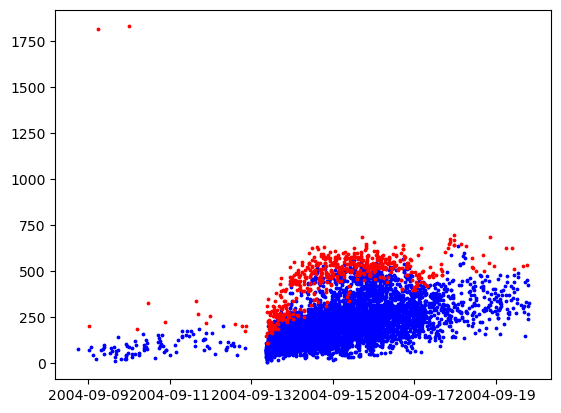

In [18]:
plt.scatter(rstT,rstD,c='b',s=3)
plt.scatter(percT,percD,c='r',s=3)

plt.show()

In [1]:
rtT=[]
rtD=[]
pcT=[]
pcD=[]
for i in range (len(rstT)):
    if rstT[i]>datetime(2004,9,13) and rstT[i]<datetime(2004,9,20):
        rtT.append(rstT[i])
        rtD.append(rstD[i])
        
for i in range (len(percT)):
    if percT[i]>datetime(2004,9,13) and percT[i]<datetime(2004,9,20):
        pcT.append(percT[i])
        pcD.append(percD[i])

NameError: name 'rstT' is not defined

In [19]:
pbp=[]
plbp=[]
phbp=[]
pstdp=[]
pb=[]
plb=[]
phb=[]
pstd=[]
pdtr=[]
for i in range(300,len(percM),30):
    print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(percM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    pb.append(b)
    pdtr.append(percT[i])
    pbp.append(bP)
    plb.append(low_b)
    plbp.append(low_bp)
    phb.append(high_b)
    phbp.append(high_bp)
    pstd.append(std)
    pstdp.append(stdp)

300
330
360
390
420
450
480
510
540
570


In [20]:
rbp=[]
rlbp=[]
rhbp=[]
rstdp=[]
rb=[]
rlb=[]
rhb=[]
rstd=[]
rdtr=[]
print(len(rstM))
for i in range(300,len(rstM),30):
    #print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(rstM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    rb.append(b)
    rdtr.append(rstT[i])
    rbp.append(bP)
    rlb.append(low_b)
    rlbp.append(low_bp)
    rhb.append(high_b)
    rhbp.append(high_bp)
    rstd.append(std)
    rstdp.append(stdp)

5220


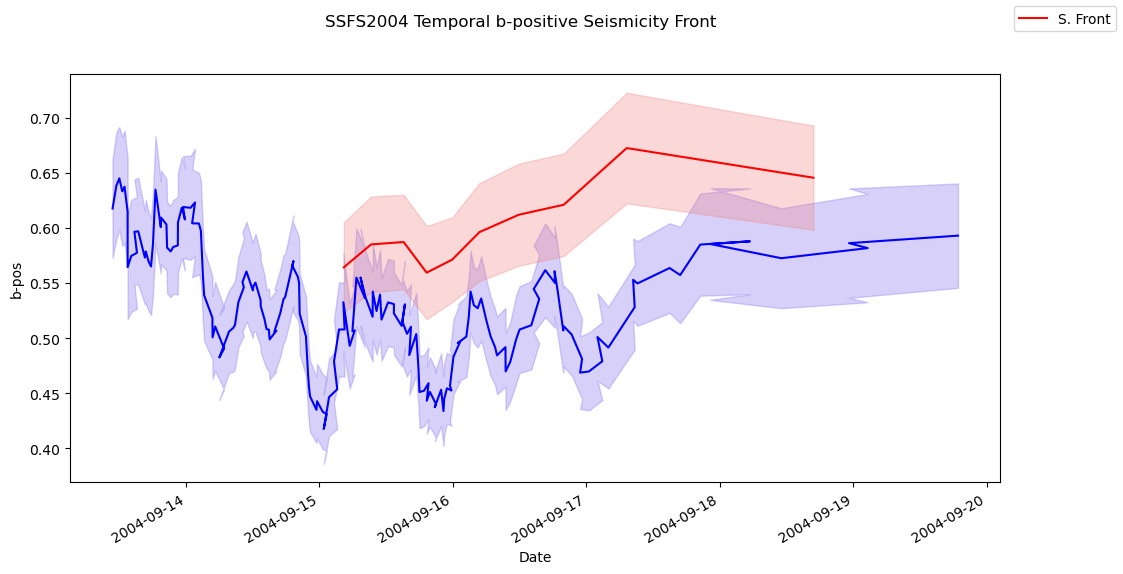

In [21]:
fig, ax1 = plt.subplots(figsize=(12,6))
fig.suptitle("SSFS2004 Temporal b-positive Seismicity Front")
ax1.plot(rdtr,rbp,color="blue")
ax1.fill_between(rdtr, np.subtract(rbp,rstdp), np.add(rbp,rstdp), alpha = 0.3, color = 'mediumslateblue')
ax1.plot(pdtr,pbp,color="red", label='S. Front')
ax1.fill_between(pdtr, np.subtract(pbp,pstdp), np.add(pbp,pstdp), alpha = 0.3, color = 'lightcoral')
#ax1.set_xlim([2,20])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

In [22]:
rstM1 = np.array(rstM)
b, Mc, hist = b_value_functions.btrad(rstM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(rstM1)
low_b, high_b, std = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
print(b,low_b,high_b)

0.4776433637430663 0.46962898424558724 0.5346572209289017


In [23]:
percM1 = np.array(percM)
b, Mc, hist = b_value_functions.btrad(percM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(percM1)
low_b, high_b, std = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
print(b,low_b,high_b)

0.48048672878408555 0.45742206149119596 0.6750689266641061


In [50]:
# 90th percentile:
# rst: 1.6443402871890591 1.5836684464531374 1.7717932563663592
# perc: 1.7584115768428121 1.4879498502571824 2.206853379741385
# 80th percentile:
# rst: 1.6131929852622278 1.5434827800024546 1.7425292956696619
# perc: 1.873392846750578 1.6550054202688385 2.2273482017613575

Me
